In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [9]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
stacked_model = StackingRegressor(estimators=[
    ('rf', rf),
    ('xgb', xgb)
], final_estimator=LinearRegression())


In [12]:
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
stacked_model.fit(X_train, y_train)


StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                  final_estimator=LinearRegression())

In [13]:
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
stacked_pred = stacked_model.predict(X_test)

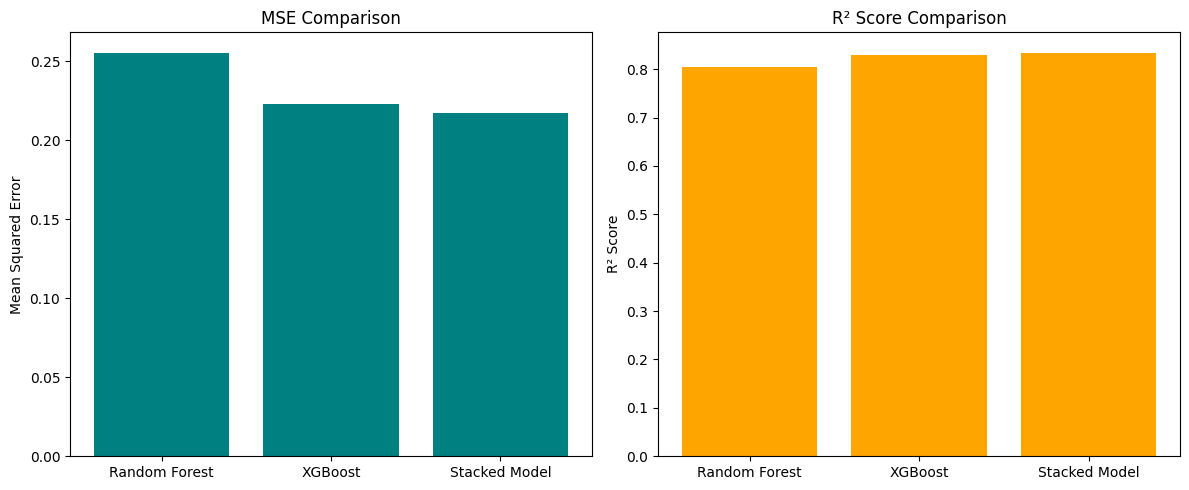

Model Evaluation:

           Model       MSE        R2
0  Random Forest  0.255368  0.805123
1        XGBoost  0.222590  0.830137
2  Stacked Model  0.217086  0.834337


In [14]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'Model': name, 'MSE': mse, 'R2': r2}

results = [
    evaluate_model("Random Forest", y_test, rf_pred),
    evaluate_model("XGBoost", y_test, xgb_pred),
    evaluate_model("Stacked Model", y_test, stacked_pred)
]

results_df = pd.DataFrame(results)


fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].bar(results_df['Model'], results_df['MSE'], color='teal')
axs[0].set_title('MSE Comparison')
axs[0].set_ylabel('Mean Squared Error')

axs[1].bar(results_df['Model'], results_df['R2'], color='orange')
axs[1].set_title('R² Score Comparison')
axs[1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()


print("Model Evaluation:\n")
print(results_df)